In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

# Decision Trees and Random Forests

<p>In this notebook, We will introduce the concept behind methods of Machine Learning for classification, named Decision Tree.</p> 

<p>The notebook assumes the reader has a previous knowledge of the main ideas behind Random Variables and Expectation of Random Variables.</p>

****

# Entropy
<p>Prior to understading what Decisions Trees are, it is necessary to be acquainted with the concept of <b>Entropy</b>.</p>
<p><b>Entropy</b> is a measure for the uncertainty of a determined random variable. Let $X$ be a random variable, with state space $\mathcal{S}$, and probability density function $P(X = x), x \in \mathcal{S}$, we have that the Entropy for $X$, namely $H(X)$, is: </p>

\begin{equation}
H(X) = - \sum_{x \in \mathcal{S}} P(X = x) log_2(P(X = x))
\end{equation}
<p>For convenience, we assume that $0\cdot log_2(0) = 0$, which is explained by the fact that $\lim_{x \to 0} xlog_2(x) = 0$</p>
<p>Entropy's unit of measurement are bits. The unit of measurement depends entirely on the base we chose for the logarithm, in the case we use $log_{10}$ or $log_3$, Entropy would be measured in dits and trits, respectively.</p>
<p><b>Note:</b> Notice that the definition of Entropy $H(X)$, is similar to the expectation of the function $g(X) = \frac{1}{log_2(P(X = X))}$ of a determined random variable $X$.</p>

\begin{equation}
H(X) = E\left[\frac{1}{log_2(P(X = X))}\right]
\end{equation}

<function matplotlib.pyplot.show(close=None, block=None)>

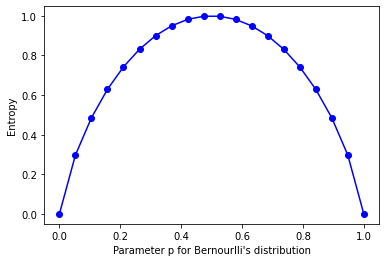

In [11]:
#Function to calculate the entropy of a probability distribution
def calculateEntropy(prob_function):
    entropy = 0
    for i in range(len(prob_function)):
        if(prob_function[i] != 0):
            entropy += prob_function[i]*np.log2(prob_function[i])
    return -entropy

#We will use a Bernoulli's distribution where our random variable assumes the values 0 and 1
#with the probabilities (1 - p) and p, respectively.
#Note that Bernoulli's distribution, gives us a different distribution for each value of p, 
#consequently, Entropy will also be different for each of those distributions.
x = np.linspace(0,1, 20)
y = [calculateEntropy([1 - p, p]) for p in x]
plt.plot(x, y, '-bo')
plt.xlabel("Parameter p for Bernourlli's distribution")
plt.ylabel("Entropy")
plt.show

<p>Above we see an exemple of an Entropy graph, for each different value of the parameter p in Bernoulli's distribution. It's easy to realize that when $p = 0$ or $p = 1$, Entropy is equal to 0, which intuitively, makes total sense, since in those cases Bernoulli's distribution would only have 0 or 1 as a result, that is, there is no uncertainty over the distribution.</p>
<p>Furthermore, we have that Entropy is maximized when $p = 0.5$, which is exactly when values 0 and 1 have equal chances of being the outcome, in other words, the uncertainty about which of the two values we will get as a result is maximum.</p>

# Mutual Information

<p>Beyond the concept of <b>Entropy</b>, we also need to address how <b> Mutual Information </b> works:</p>
\begin{equation}
I(X,Y) = H(X) - H(X|Y)
\end{equation}
<p>Notice that now we have introduced <b>Conditional Entropy</b> $H(X|Y)$, prior to addressing this matter properly, we shall understand the intuition behind Mutual Information, we are calculating the amount reduced in the Entropy of X when conditioned on Random Variable Y. In other words, how much conditioning X on Y, reduced the uncertainty of X.</p>
<p>From this, it is possible to realize that Mutual Information is a measure of dependency between random variables, that is, if we have big reduction in the uncertainty of X, when conditioning the value of X on Y, it is possible to claim that Y and X are related to the deegre of how big that reduction is.</p>

***

<p> <b>Conditional Entropy</b> $H(X|Y)$, comes from the definition of <b>Entropy</b>, shown previously, from the expectation of a function of Random Variables:</p>
\begin{equation}
H(X|Y) = E\left[\frac{1}{log_2(P(X = x | Y = y))} \right] = - E\left[log_2(P(X = x | Y = y)) \right] 
\end{equation}
\begin{equation}
= - \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y)\cdot log_2(P(X = x | Y = y))
\end{equation}
<p>With $ \mathcal{Y}$ e $\mathcal{X}$ being the state spaces of the random variables Y and X, respectively.</p>

<p>Now that we know <b>Conditional Entropy</b>, we can get a better equation for the <b>Mutual Information</b>:</p>
\begin{equation}
I(X,Y) = H(X) - H(X|Y) = - \sum_{x \in \mathcal{S}} P(X = x) log_2(P(X = x))  - \left(- \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y)\cdot log_2(P(X = x | Y = y)) \right)
\end{equation}
\begin{equation}
= - \sum_{x \in \mathcal{X}} P(X = x) log_2(P(X = x))  + \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y)\cdot log_2(P(X = x | Y = y))
\end{equation}
\begin{equation}
= - \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y) \cdot log_2(P(X = x))  + \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y)\cdot log_2(P(X = x | Y = y))
\end{equation}
\begin{equation}
= \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y) \cdot log_2\left(\frac{P(X = x | Y = y)}{P(X = x)}\right)
\end{equation}
\begin{equation}
I(X, Y)= \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y) \cdot log_2\left(\frac{P(X = x, Y = y)}{P(X = x)P(Y = y)}\right)
\end{equation}

Where the second to third equality, comes from the fact that:
\begin{equation}
P(X = x) = \sum_{y \in \mathcal{Y}} P(X = x|Y = y)P(Y=y) = \sum_{y \in \mathcal{Y}} P(X = x,Y = y)
\end{equation}
Which is the application of the Law of Total Probability

<p>
That way, we have for <b>Mutual Information</b> $I(X, Y)$:
\begin{equation}
    I(X, Y)= \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} P(X = x, Y = y) \cdot log_2\left(\frac{P(X = x, Y = y)}{P(X = x)P(Y = y)}\right)
\end{equation}
</p>

# Decision Trees
A <b>Decision Tree</b> is a structure of relation between categories. Each of the nodes of a Decision Tree represents a kind of "test" in a determined <i>feature</i>, the relations between each of the nodes ("branches" of the tree) represent the values that can be assigned to such <i>feature</i>.

---

For a better understanding, we will use the following dataset as an example, it contains data about how weather was in a specific day and, whether or not people played tennis that day.<br>
The variable Outlook contains the values <b>Sunny</b>, <b>Overcast</b> and <b>Rain</b>.<br>
The variable Temperature contains the values <b>Hot</b>, <b>Mild</b> and <b>Cold</b>.<br>
The variable Humidity contains the values <b>High</b> e <b>Normal</b>.<br>
The variable Wind contains the values <b>Strong</b> and <b>Weak</b>.<br>
The variable PlayTennis contains the values <b>Yes</b> and <b>No</b>, indicating whether or not tennis was played that day.<br>

In [12]:
col_names = ['Outlook','Temperature','Humidity','Wind','PlayTennis']

example = pd.read_csv("exemplo_arvore.csv", header=None, names=col_names)
example.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


It is possible to see a Decision Tree generated for this dataset in the figure below.<br> Note that we are deciding whether we will play tennis or not based off the wheather information we have.<br>


![arvore_jogartennis](decision_tree.png)

What the Decision Tree above is telling us is the following:<br>
In case the Outlook is Sunny, we will play tennis if Humidity is Normal, in case it is High, we won't play.<br>
In case the Outlook is Overcast, we will play tennis.<br>
In case the Outlook is Rain, we will play tennis if Wind is Weak, in case it is Strong, we won't play.<br>

Note that when we want to model a problem, where the column  <i>target</i>, in the example above 'PlayTennis', can get assigned only two values, we have a boolean function.<br>
In the case above it is possible to map:<br>
No $\rightarrow$ False <br>
Yes $\rightarrow$ True <br>
And just like that, build a Truth Table for the Decision Tree:
<table>
  <tr>
    <th>Outlook = Sunny</th>
    <th>Outlook = Overcast</th>
    <th>Outlook = Rain</th>
    <th>Humidity = High</th>
    <th>Humidity = Normal</th>
    <th>Wind = Strong</th>
    <th>Wind = Weak</th>
    <th>PlayTennis</th>
  </tr>
  <tr>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
  </tr>
  <tr>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>True</td>
  </tr>
  <tr>
    <td>False</td>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
    <td>True</td>
  </tr>
  <tr>
    <td>False</td>
    <td>False</td>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>True</td>
    <td>False</td>
    <td>False</td>
  </tr>
  <tr>
    <td>False</td>
    <td>False</td>
    <td>True</td>
    <td>False</td>
    <td>False</td>
    <td>False</td>
    <td>True</td>
    <td>True</td>
  </tr>
</table>  
Many lines of the table above were omitted, otherwise, such table would be humongous. More specifically, since we have 7 columns used for classification, and each of those can get assigned two values: True or False. We have $2^7 = 128$ possible combinations of values, that is, this Truth Table complete, would have 128 lines.

# The problem with the best Decision Tree
Having defined how a Decision Tree works, it is easy to observe that modifying the <i>features</i> we choose for each of the nodes gives us different trees as a result.<br><br>
From this observation, one can easily infer that there are many different Decision Trees for the same problem, in the example above, the Decision Tree is built using 7 attributes ('Outlook = Sunny', 'Outlook = Overcast', 'Outlook = Rain', 'Humidity = High', 'Humidity = Normal', 'Wind = Strong' e 'Wind = Weak') and we saw that the Truth Table for this tree would have $2^7$ lines.<br>
Notice that given a determined number of attributes, let's say $n$, for a single Decision Tree $T$, the Truth Table of $T$ would have $2^n$ lines.<br>

Intuitively if we were to get only the target column 'PlayTennis', we would have a vector with $2^n$ elements, as observed below:
<table>
  <tr>
    <th>PlayTennis</th>
  </tr>
  <tr>
    <td>False</td>
  </tr>
  <tr>
    <td>True</td>
  </tr>
  <tr>
    <td>True</td>
  </tr>
  <tr>
    <td>False</td>
  </tr>
  <tr>
    <td>True</td>
  </tr>
  <tr>
    <td>...</td>
  </tr>
</table>  
Different Decision Trees, that solve the same problem, use the same attributes for classification, the only thing that changes in those trees, is the classification itself. That is, for every different Decision Tree possible, we have the same Truth Table, except for the <i>target</i> column, in the example above the column 'PlayTennis'.<br>

From that, the total quantity of Decision Trees for a determined problem, is the total combination of values that each of the elements of the <i>target</i> columns in the Truth Table can get assigned to. Since the vector generated by the <i>target</i> column is a vector of $2^n$ elements (being $n$ the number of attributes), we have that each of the elements in this vector can get assigned a value (True or False), therefore, the total number of combinations is $2^{2^n}$.<br>
Thus, in the example above, since we are using 7 attributes, we would have $2^{2^7} = 3.4 \cdot 10^{38}$ possible Decision Trees that can be built (and we didn't even consider the Temperature <i>feature</i>).<br>

To determine which Decision Tree is the best Decision Tree, it would be necessary to iterate over all $3.4 \cdot 10^{38}$ possible trees and check which one best classifies our <i>target</i> 'PlayTennis'. It is, definitely impracticable to iterate over so many trees, and because of that we need a kind of heuristic that will help us estimate a tree that is good enough.

# How to find a "good" tree

Notice that we are making use of the word "good", in quotes, since we are building an algorithm for finding a tree that is good and not optimal (as seen before the optimal tree is a intractable problem).<br>
The idea is to put the most important attributes closer to the root of the tree, while the least important attributes get put in the lower levels of the tree. By "most important attributes" we refer to the attributes that better classify our <i>target</i>. <br>

For example, in the problem above, we see that the attribute 'Outlook = Overcast', classifies well 'PlayTennis', since  in every case where 'Outlook = Overcast' we see 'PlayTennis' as True, in other word, conditioning 'PlayTennis' on 'Outlook = Overcast', would reduce uncertainty (or <b>Entropy</b>) in 'PlayTennis'.<br>
In order to build the algorithm, instead of choosing the attributes that better classify the <i>target</i>, we shall choose the <i>features</i>, as seen previously, the <i>features</i> are the nodes of the trees and the attributes are the edges between the nodes.<br>

Furthermore, we have a good way of determing how much uncertainty in a random variable is reduced, when we condition it on another one, and that is the <b>Mutual Information</b>.<br>

In the example of 'PlayTennis', in order to choose the <i>feature</i> that better classifies 'PlayTennis', we would calculate I(PlayTennis, Outlook), I(PlayTennis, Humidity), I(PlayTennis, Wind) and I(PlayTennis, Temperature) and choose the <i>feature</i> that maximizes the <b>Mutual Information</b>.<br>

After we have decided the first <i>feature</i> that will be used to classify the <i>target</i>, we use such <i>feature</i>, to split our dataset into $n$ datasets, where $n$ is the number of attributes that can get assigned to the chosen <i>feature</i>.<br>

Aplying this idea to the example of 'PlayTennis', suppose that the chosen <i>feature</i> is 'Humidity', which has two attributes associated to it ('High' or 'Normal'), we build two dataframes que that together form the original dataframe, in one of them we will have every line of the original dataframe, where 'Humidity = High' e in the other one we will have every line of the original dataframe, where 'Humidity = Normal'.<br>

Using the generated dataframes, from the split of the original <i>dataframe</i>, we shall do the same process of classification, choosing the <i>feature</i> that best classifies 'PlayTennis' in each of the generated dataframes gerados. Notice that, as soon as the original dataframe is split into $n$ dataframes, each of these new <i>dataframes</i> is a new Decision Tree problem, with less examples (or lines) and minus one <i>feature</i>.

We shall do such process of splitting the dataframe, until we don't have any more <i>features</i> to use in the classification, or until the <b>Entropy</b> in <i>target</i> is 0, that is, all the values in the column <i>target</i> are the same.


# Scikit-learn's Decision Tree

We will use the method 'DecisionTreeClassifier' from the scikit-learn library on python, to classify our dataset of 'PlayTennis'.<br>

In [13]:
X = example.loc[:, example.columns != 'PlayTennis']
y = example.PlayTennis

The data in our example is categorical and the Decision Tree classifier from scikit-lean does not work with this kind of data. We need to treat data before building our classifier. For this we will use the function from pandas "pd.get_dummies" that converts ctegorical attributes into attributes with values 0 and 1.<br>
For example, the attribute Humidity that can receive the values High and Normal, is now represented by attributes Humidity_High e Humidity_Normal, that can get assigned the values 0 and 1.<br>
Those new created variables are called dummy variables, a categorical variable with $n$ attributes, leads to $n$  dummy variables, one for each attribute.<br>

In [14]:
X_dummy = pd.get_dummies(X) #transforming the dataset
X_dummy.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1


And in the following cell, we create the class for the Decision Tree classifier from scikit-learn, besides using the method 'fit' to create the tree for the data we have.

In [15]:
# creating the variable for the Decision Tree classifier.
clf = DecisionTreeClassifier(criterion="entropy")

# We use the method fit to build the decision tree out of our data.
clf = clf.fit(X_dummy, y)

In [16]:
clf.predict(X_dummy)

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

It's possible to use the method 'plot_tree', which is also from the scikit-learn library, to visualize the tree.

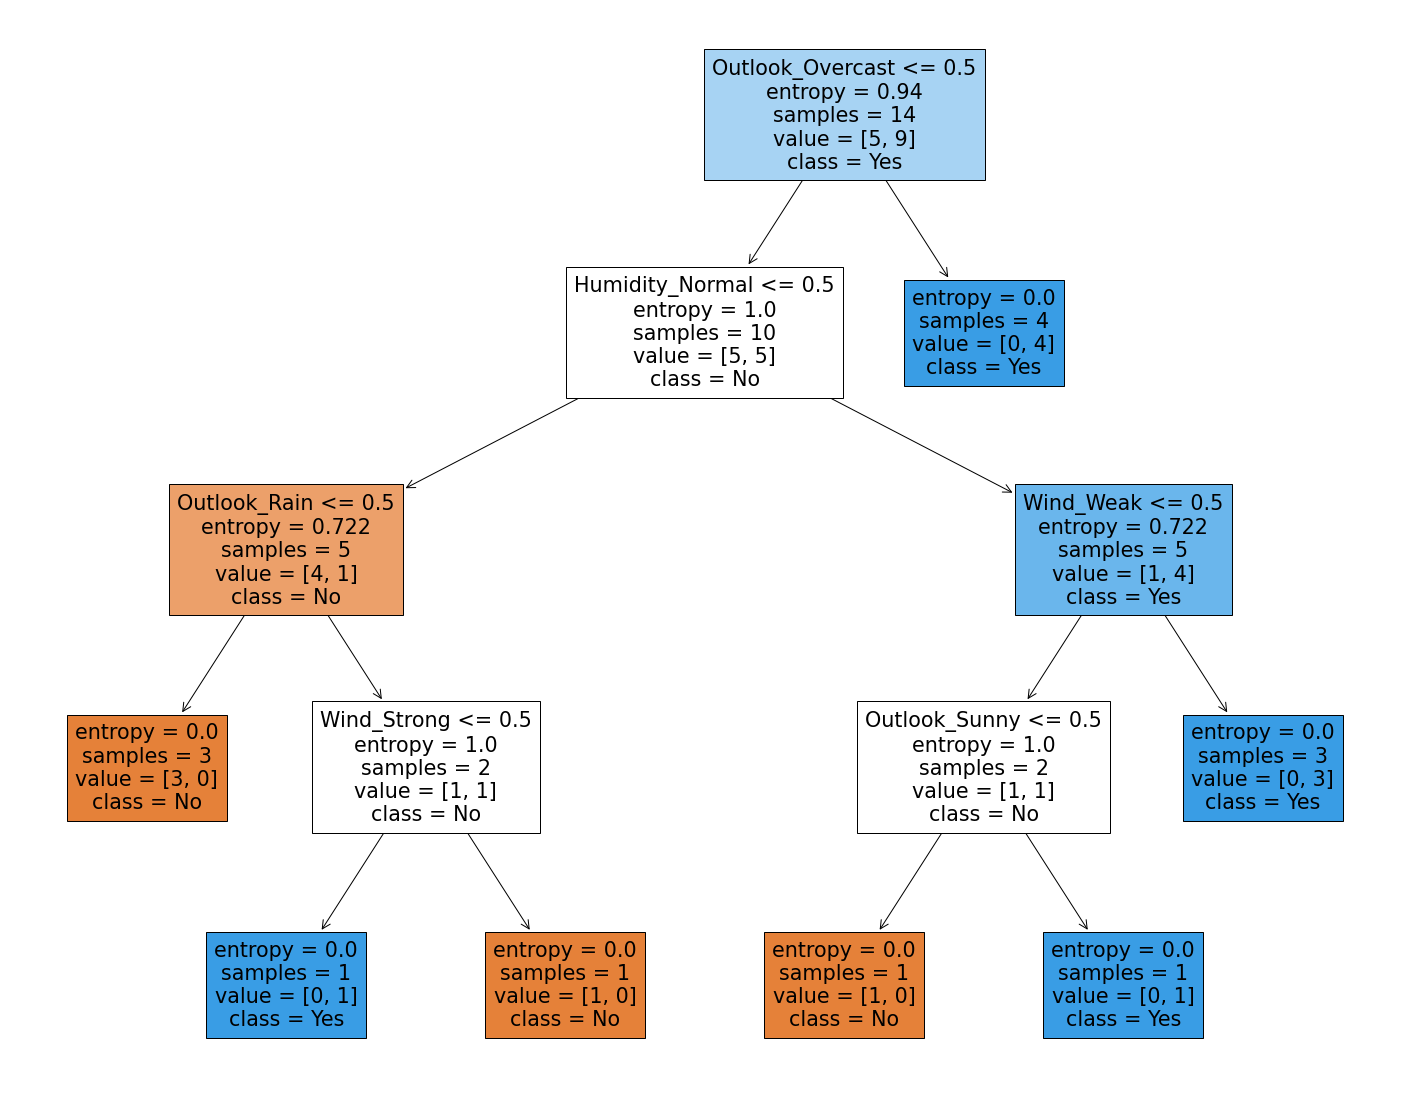

In [17]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, feature_names=X_dummy.columns, class_names=list(y.unique()), filled=True)


# Random Forests

As said previously, Decision Trees are built based off an heuristic of what is the best tree. Since such process comes from an heuristic, there is no guarantee that the generated tree is, in fact, the best tree, as a matter of fact, there are other heuristics for the construction of a Decision Tree, what was presented previously is just one of them. <br>
From the idea that we can have many different Decision Trees that classify the <i>target</i>, comes the notion of <b>Random Forests</b>.<br>

---
The idea behind Random Forests, relies on generating several different Decision Trees, that would classify the <i>target</i> differently, and in that way, make all of those Decision Trees vote in the best classification.

In order to start building a Random Forest, initially we shall decide how many trees there will be in that Forest.<br>
After deciding the amount of trees in the Forest, we will make a new dataset from the original, selecting samples from the original dataset randomly, these selected samples will be present in this new dataset we are building. The technique is called <i>Bagging</i>.<br>
For each tree in the Random Forest there will be a new dataset generated from the <i>Bagging</i> technique, which will also be the dataset used to train the tree it is associated with.<br>

There are many different ways of choosing heuristics for building Decision Trees in a Random Forest. The default from the 'sklearn' library, is to select at each iteration a limited number of <i>features</i> that could be in the node of the current iteration.<br>
In 'sklearn', it is possible to define a constant $n$, in a way that in each iteration, the algorithm can choose only $n$ <i>features</i> selected randomly. The 'sklearn' library also provides the option of defining a function of the available number of <i>features</i>.<br>
For example, let $n$ be the number of available <i>features</i> in the current iteration, sklearn's default is to select $\sqrt{n}$ random <i>features</i> that can be chosen for that node.

# Scikit-learn's Random Forest

We will use the method 'RandomForestClassifier' from scikit-learn library on python, to classify our 'PlayTennis' dataset.

In [18]:
#Building the Random Forest classifier
#The parameter n_estimators is how many trees are gonna be in the forest
#The parameter bootstrap is telling the algorithm to execute the process of Bagging for each tree.
#The parameter max_features is the number of features that can be chosen at each iteration, in the following case
#the number is the square root of how many features are available.
#The parameter criterion is the criteron used to build the tree, in this case Entropy/Mutual Information.
clf = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features="sqrt", criterion="entropy")

# We use the method fit to build the classifier from the data provided.
clf = clf.fit(X_dummy, y)

In [19]:
clf.predict(X_dummy)

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

The forest is composed by 100 trees (parameter that can be changed in 'n_estimators'), because of that it is not possible to visualize the entire forest, therefore, we pick one tree to be shown.

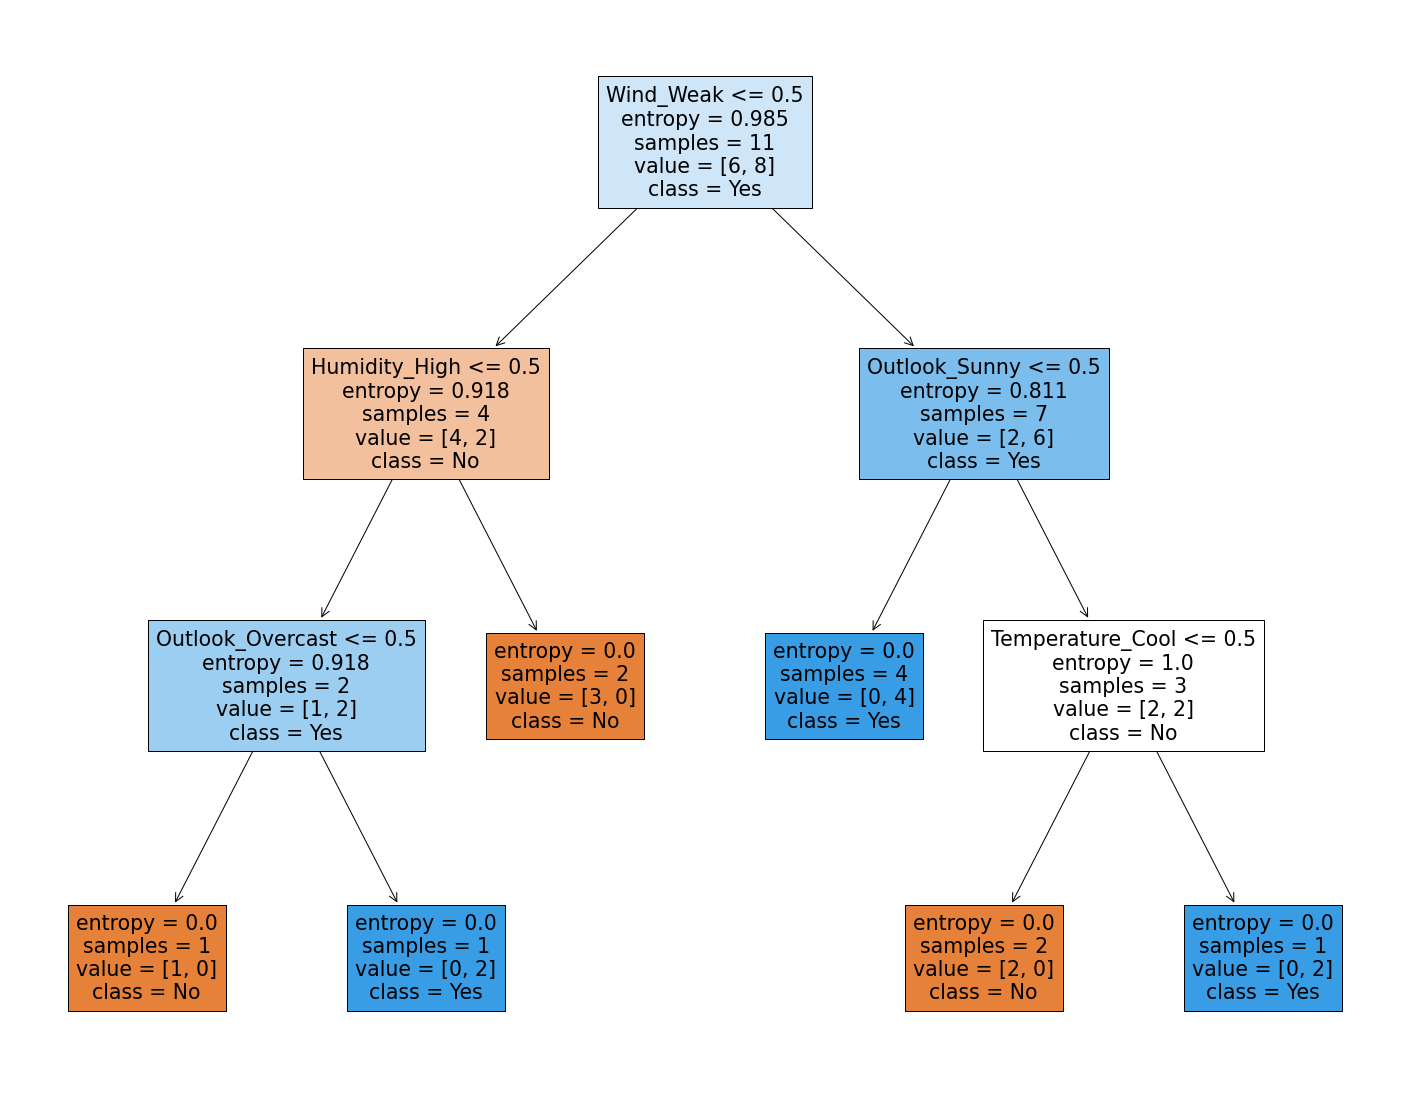

In [20]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf.estimators_[25], feature_names=X_dummy.columns, class_names=list(y.unique()), filled=True)